<a href="https://colab.research.google.com/github/AalaaNagy88/Boycott_France/blob/master/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Dataset

In [80]:
df = pd.read_csv(f'MCSDatasetNEXTCONLab.csv')
df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)

#train_test_split
trDf = df[:10139][:]
teDf = df[10139:][:]
trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values
trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

# Function

In [81]:
def plotDataset(X, y):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label,alpha=.3)
  plt.legend()
  plt.show()

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def visualize_classification_report(model,title,trX,trY,teX,teY):
  model.fit(trX,trY)
  y_pred = model.predict(teX)
  accuracy=round(model.score(teX, teY)*100,2)
  print('Accuracy of model: {:.2f}%'.format(accuracy))

  ConfusionMatrixDisplay.from_predictions(teY, y_pred)
  plt.show()
  return accuracy

In [83]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

def randomSearch(model,params):
  clf = RandomizedSearchCV(model, params, random_state=0)
  search = clf.fit(trX, trY)
  return search.best_params_

def gridSearch(model,params):
  clf = GridSearchCV(model, params)
  search = clf.fit(trX, trY)
  return search.best_params_

#Question 1

##DT

Accuracy of model: 94.15%


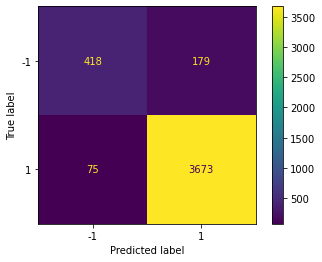

In [84]:
from sklearn.tree import DecisionTreeClassifier
# params=gridSearch(DecisionTreeClassifier(),dict(criterion=["gini","entropy"]))
# dt_cls = DecisionTreeClassifier(criterion=params["criterion"])

dt_cls = DecisionTreeClassifier()
dt_acc=visualize_classification_report(dt_cls,"Decision tree",trX,trY,teX,teY)


##SVM

Accuracy of model: 86.26%


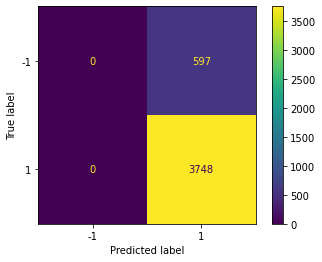

In [85]:
from sklearn.svm import SVC
# params=gridSearch(SVC(),{'gamma': ['scale','auto'],'kernel': ['rbf','linear','poly','sigmoid','precomputed']})
# svm_cls = SVC(gamma=params["gamma"],kernel=params["kernel"])
svm_cls = SVC()
svm_acc=visualize_classification_report(svm_cls,"Decision tree",trX,trY,teX,teY)


##Adaboosting

Accuracy of model: 95.28%


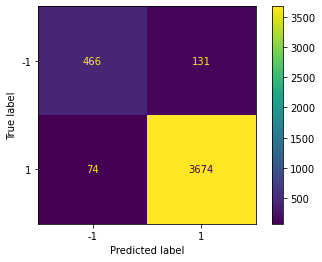

In [86]:
from sklearn.ensemble import AdaBoostClassifier

# params=gridSearch(AdaBoostClassifier(),dict(n_estimators=[10,50,100,200],learning_rate=[.1,1,2]))
# ada_cls = AdaBoostClassifier(n_estimators=params["n_estimators"],learning_rate=params["learning_rate"],random_state=rs)
ada_cls = AdaBoostClassifier()
ada_acc=visualize_classification_report(ada_cls,"AdaBoosting classifier",trX,trY,teX,teY)

##Basic accuracy bar chart

<BarContainer object of 3 artists>

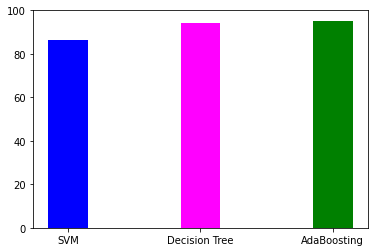

In [87]:
accurcies={"SVM":svm_acc,"Decision Tree":dt_acc,"AdaBoosting":ada_acc}
plt.bar(list(accurcies.keys()),list(accurcies.values()),width=.3,color=['blue','magenta',"green"])

#Question 2

In [88]:
trDf.Ligitimacy.value_counts()

 1    8839
-1    1300
Name: Ligitimacy, dtype: int64

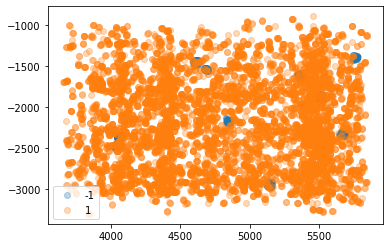

In [89]:
plotDataset(trX,trY)

##Synthetic Minority Oversampling Technique(SMOTE)
new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class

In [90]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
smote_trX, smote_trY = oversample.fit_resample(trX,trY)


In [91]:
Counter(smote_trY)

Counter({-1: 8839, 1: 8839})

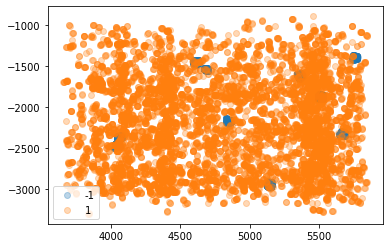

In [92]:
plotDataset(smote_trX, smote_trY)

Accuracy of model: 92.84%


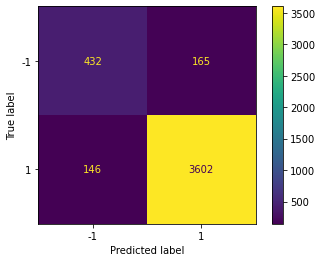

In [93]:
smote_dt_cls = DecisionTreeClassifier()
smote_dt_acc=visualize_classification_report(smote_dt_cls,"SMOTE with Decision tree",smote_trX,smote_trY,teX, teY)

Accuracy of model: 44.53%


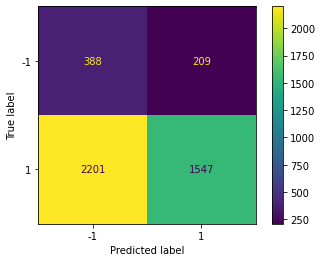

In [94]:
smote_svm_cls = SVC()
smote_svm_acc=visualize_classification_report(smote_svm_cls,"SMOTE with SVM",smote_trX,smote_trY,teX, teY)

Accuracy of model: 92.45%


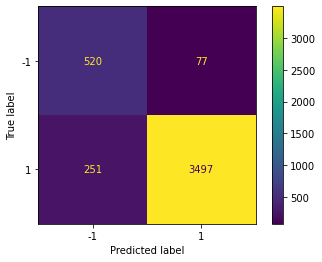

In [95]:
smote_ada_cls = AdaBoostClassifier()
smote_ada_acc=visualize_classification_report(smote_ada_cls,"SMOTE with AdaBoosting classifier",smote_trX,smote_trY,teX, teY)

In [96]:
smote_accurcies={"SVM":smote_svm_acc,"Decision Tree":smote_dt_acc,"AdaBoosting":smote_ada_acc}

##Adaptive Synthetic Sampling (ADASYN)
This modification to SMOTE. ADASYN is based on the idea of adaptively generating minority data samples according to their distributions

In [97]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
ass_trX,ass_trY= oversample.fit_resample(trX, trY)

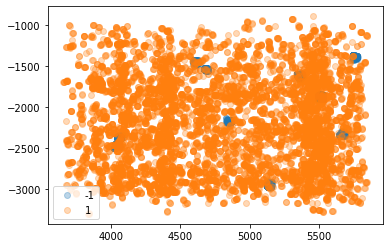

In [98]:
plotDataset(ass_trX, ass_trY)

In [99]:
Counter(ass_trY)

Counter({-1: 8879, 1: 8839})

Accuracy of model: 93.28%


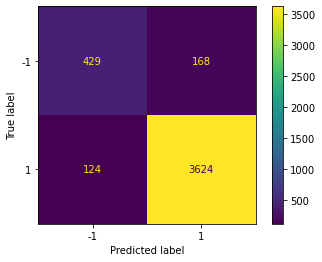

In [100]:
ass_dt_cls = DecisionTreeClassifier()
ass_dt_acc=visualize_classification_report(ass_dt_cls,"ADASYN with Decision tree",ass_trX,ass_trY,teX, teY)

Accuracy of model: 54.18%


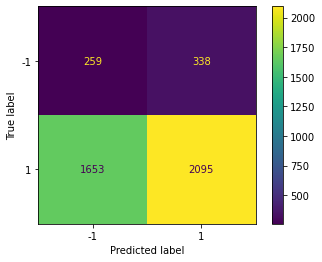

In [101]:
ass_svm_cls = SVC()
ass_svm_acc=visualize_classification_report(ass_svm_cls,"ADASYN with SVM",ass_trX,ass_trY,teX, teY)

Accuracy of model: 92.24%


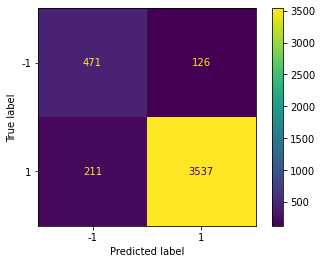

In [102]:
ass_ada_cls = AdaBoostClassifier()
ass_ada_acc=visualize_classification_report(ass_ada_cls,"ADASYN with AdaBoosting classifier",ass_trX,ass_trY,teX, teY)

In [103]:
ass_accurcies={"SVM":ass_svm_acc,"Decision Tree":ass_dt_acc,"AdaBoosting":ass_ada_acc}

##RandomUnderSampler

In [104]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
rus_trX,rus_trY= under.fit_resample(trX, trY)

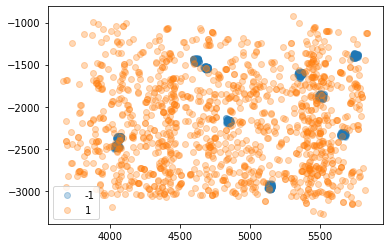

In [105]:
plotDataset(rus_trX, rus_trY)

In [106]:
Counter(rus_trY)

Counter({-1: 1300, 1: 1300})

Accuracy of model: 93.12%


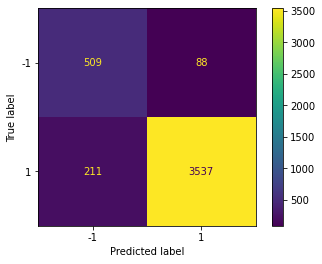

In [107]:
rus_dt_cls = DecisionTreeClassifier()
rus_dt_acc=visualize_classification_report(ass_dt_cls,"RandomUnderSample with Decision tree",rus_trX,rus_trY,teX, teY)

Accuracy of model: 52.43%


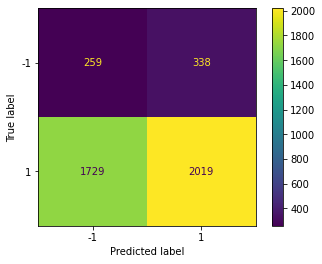

In [108]:
rus_svm_cls = SVC()
rus_svm_acc=visualize_classification_report(rus_svm_cls,"RandomUnderSample with SVM",rus_trX,rus_trY,teX, teY)

Accuracy of model: 91.16%


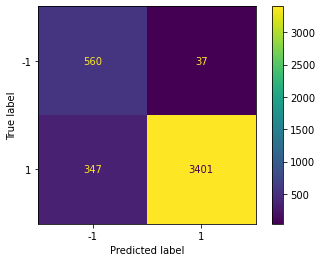

In [109]:
rus_ada_cls = AdaBoostClassifier()
rus_ada_acc=visualize_classification_report(rus_ada_cls,"RandomUnderSample with AdaBoosting classifier",rus_trX,rus_trY,teX, teY)

In [110]:
rus_accurcies={"SVM":rus_svm_acc,"Decision Tree":rus_dt_acc,"AdaBoosting":rus_ada_acc}

##SMOTE and RandomUnderSampler

In [111]:
from imblearn.pipeline import Pipeline
steps = [('over', SMOTE()), ('under', RandomUnderSampler())]
pipeline = Pipeline(steps=steps)
concat1_trX, concat1_trY = pipeline.fit_resample(trX,trY)


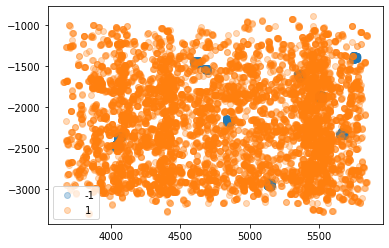

In [112]:
plotDataset(concat1_trX, concat1_trY)

In [113]:
Counter(concat1_trY)

Counter({-1: 8839, 1: 8839})

Accuracy of model: 94.68%


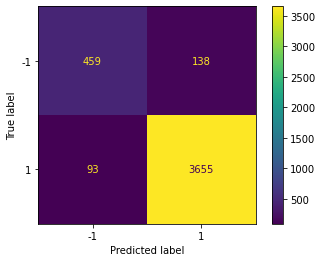

In [114]:
concat1_dt_cls = DecisionTreeClassifier()
concat1_dt_acc=visualize_classification_report(concat1_dt_cls,"RandomUnderSample and SMOTE with Decision tree",concat1_trX,concat1_trY,teX, teY)

Accuracy of model: 44.53%


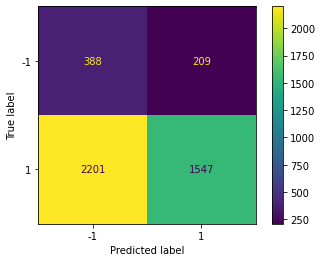

In [115]:
concat1_svm_cls = SVC()
concat1_svm_acc=visualize_classification_report(concat1_svm_cls,"RandomUnderSample and SMOTE with SVM",concat1_trX,concat1_trY,teX, teY)

Accuracy of model: 92.04%


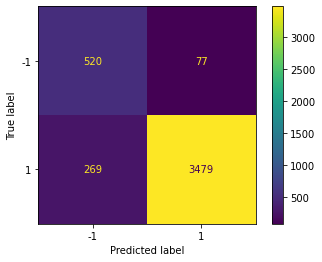

In [116]:
concat1_ada_cls = AdaBoostClassifier()
concat1_ada_acc=visualize_classification_report(concat1_ada_cls,"RandomUnderSample and SMOTE with AdaBoosting classifier",concat1_trX,concat1_trY,teX, teY)

In [117]:
concat1_accurcies={"SVM":concat1_svm_acc,"Decision Tree":concat1_dt_acc,"AdaBoosting":concat1_ada_acc}

##ADASYN and RandomUnderSampler

In [118]:
from imblearn.pipeline import Pipeline
steps = [('over', ADASYN()), ('under', RandomUnderSampler())]
pipeline = Pipeline(steps=steps)
concat2_trX, concat2_trY = pipeline.fit_resample(trX,trY)


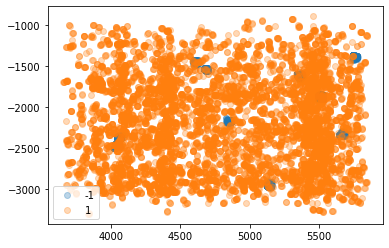

In [119]:
plotDataset(concat2_trX, concat2_trY)

In [120]:
Counter(concat2_trY)

Counter({-1: 8839, 1: 8839})

Accuracy of model: 93.37%


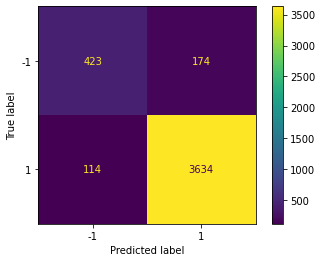

In [121]:
concat2_dt_cls = DecisionTreeClassifier()
concat2_dt_acc=visualize_classification_report(concat2_dt_cls,"RandomUnderSample and ADASYN with Decision tree",concat2_trX,concat2_trY,teX, teY)

Accuracy of model: 55.07%


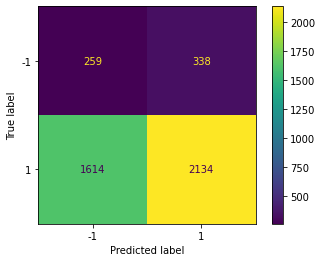

In [122]:
concat2_svm_cls = SVC()
concat2_svm_acc=visualize_classification_report(concat2_svm_cls,"RandomUnderSample and ADASYN with SVM",concat2_trX,concat2_trY,teX, teY)

Accuracy of model: 92.47%


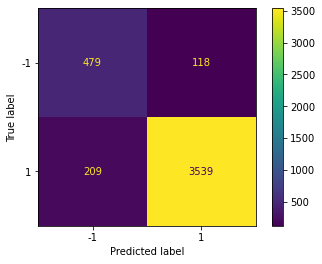

In [123]:
concat2_ada_cls = AdaBoostClassifier()
concat2_ada_acc=visualize_classification_report(concat2_ada_cls,"RandomUnderSample and ADASYN with AdaBoosting classifier",concat2_trX,concat2_trY,teX, teY)

In [124]:
concat2_accurcies={"SVM":concat2_svm_acc,"Decision Tree":concat2_dt_acc,"AdaBoosting":concat2_ada_acc}

##accuracy vs over/under-sampling methods

In [125]:
df=pd.DataFrame()
df=df.append(accurcies, ignore_index = True)
df=df.append(smote_accurcies, ignore_index = True)
df=df.append(ass_accurcies, ignore_index = True)
df=df.append(rus_accurcies, ignore_index = True)
df=df.append(concat1_accurcies, ignore_index = True)
df=df.append(concat2_accurcies, ignore_index = True)
df

,AdaBoosting,Decision Tree,SVM
0,95.28,94.15,86.26
1,92.45,92.84,44.53
2,92.24,93.28,54.18
3,91.16,93.12,52.43
4,92.04,94.68,44.53
5,92.47,93.37,55.07


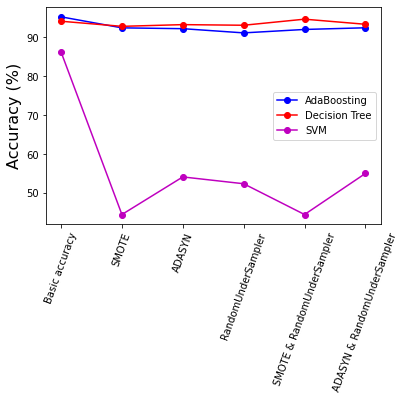

In [126]:
x=["Basic accuracy","SMOTE","ADASYN","RandomUnderSampler","SMOTE & RandomUnderSampler","ADASYN & RandomUnderSampler"]
plt.plot(x,df["AdaBoosting"].values,'-bo',label='AdaBoosting')
plt.plot(x,df["Decision Tree"].values,'-ro',label='Decision Tree')
plt.plot(x,df["SVM"].values,'-mo',label='SVM')
plt.xlabel("", fontsize=16)
plt.xticks(rotation=70)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()

## Accuracies vs ML method

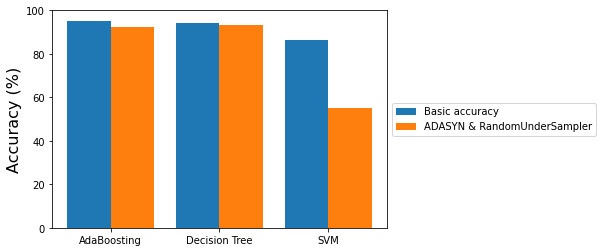

In [127]:
X = ["AdaBoosting","Decision Tree","SVM"]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, df.iloc[0].values, 0.4, label = 'Basic accuracy')
plt.bar(X_axis + 0.2, df.iloc[5].values, 0.4, label = 'ADASYN & RandomUnderSampler')

plt.xticks(X_axis, X)
plt.ylabel("Accuracy (%)",fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()